# **Perception and Computer Vision**

# Topic 1.2: Image Processing Techniques
**CSST106: 9/21/24**



# **Objective:**
Understand and apply various image processing techniques, including image transformations and filtering,
using tools like OpenCV. Gain hands-on experience in implementing these techniques and solving
common image processing tasks.

In [4]:
# OpenCV package to enable image processing capabilities
!pip install opencv-python-headless


In [5]:
# Installing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

In [7]:
# Function to display an image using matplotlib with optional color map support
def display_image(img, title="Image", cmap=None):
    """
    Displays an image using matplotlib with customizable title and color map.

    Parameters:
    img (numpy.ndarray): The image to be displayed.
    title (str): The title of the image plot.
    cmap (str, optional): Color map for display; useful for grayscale images.

    Returns:
    None
    """
    # Convert image from BGR (OpenCV format) to RGB
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if cmap is None else img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [3]:
# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')
    plt.show()

In [9]:
# Function to display two images side by side using matplotlib
def display_images(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    """
    Displays two images side by side for easy comparison.

    Parameters:
    img1, img2 (numpy.ndarray): The images to be displayed.
    title1, title2 (str): Titles for each image subplot.
    cmap1, cmap2 (str, optional): Color maps for each image; useful for displaying grayscale images.

    Returns:
    None
    """
    # Create a figure with two subplots
    plt.figure(figsize=(14, 6))

    # Display the first image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) if cmap1 is None else img1, cmap=cmap1)
    plt.title(title1)
    plt.axis('off')

    # Display the second image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) if cmap2 is None else img2, cmap=cmap2)
    plt.title(title2)
    plt.axis('off')

    # Show the images
    plt.tight_layout()
    plt.show()


# Proceed with Uploading the image to be processed

Upload an image file:


Saving FCT.jpg to FCT.jpg


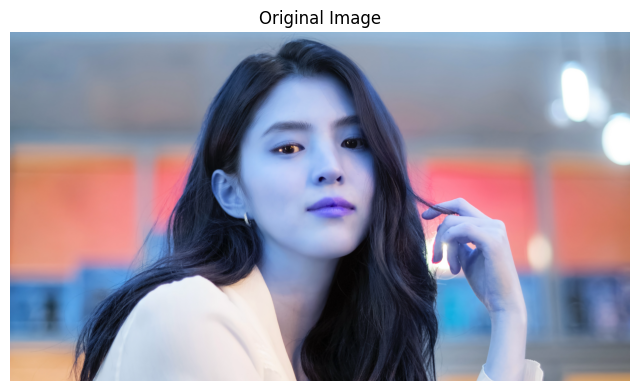

In [10]:
# Function to upload and load an image file
def upload_image():
    """
    Prompts the user to upload an image file and loads it as a NumPy array.

    Returns:
    - image_path (str): The filename of the uploaded image.
    - image (numpy.ndarray): The loaded image as a NumPy array.
    """
    print("Upload an image file:")
    uploaded = files.upload()  # Allows the user to upload an image file
    image_path = next(iter(uploaded))  # Get the first uploaded file's name
    image = Image.open(BytesIO(uploaded[image_path]))  # Open the uploaded image
    image = np.array(image)  # Convert the image to a NumPy array for processing
    return image_path, image

# Call the function to upload an image
image_path, image = upload_image()
display_image(image, title="Original Image")


# Scaling and Display

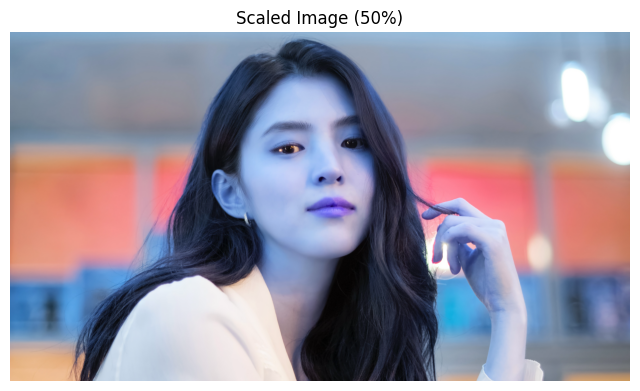

In [11]:
# Converting the image from RGB to BGR for OpenCV compatibility
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Scaling the image by 50%
scaled_image = cv2.resize(image_bgr, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
display_image(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB), title="Scaled Image (50%)")


# Rotation

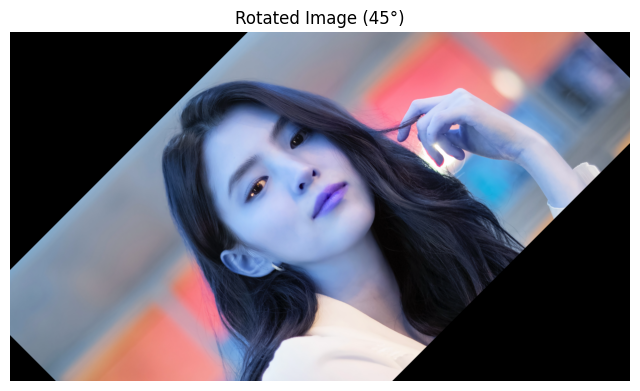

In [12]:
# Rotating the image by 45 degrees
height, width = image_bgr.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 45, 1)
rotated_image = cv2.warpAffine(image_bgr, rotation_matrix, (width, height))
display_image(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB), title="Rotated Image (45°)")


# Gaussian Blur

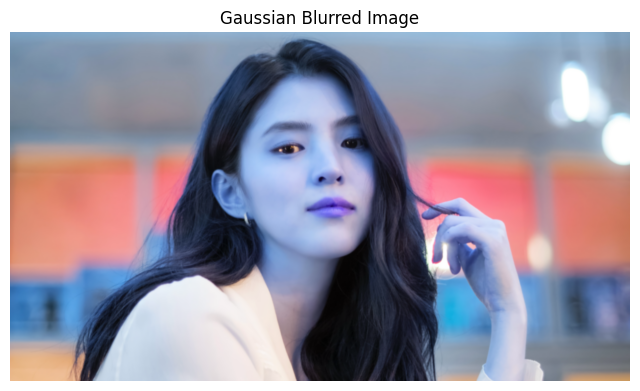

In [13]:
# Applying Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image_bgr, (15, 15), 0)
display_image(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB), title="Gaussian Blurred Image")


# Canny Edge Detection

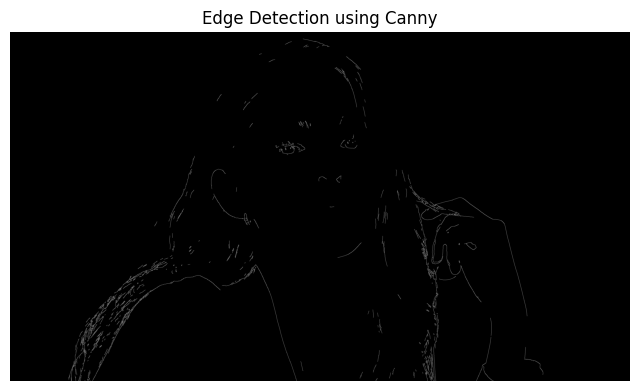

In [14]:
# Applying Canny edge detection
edges = cv2.Canny(image_bgr, 100, 200)
display_image(edges, title="Edge Detection using Canny", cmap='gray')
